In [2]:
# Load modules
%matplotlib inline
import cosima_cookbook as cc
import dataset
import pandas as pd
import tqdm
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections

netcdf_index loaded.


In [3]:
salt = cc.get_nc_variable('access-om2-01/01deg_jra55v13_ryf8485_spinup6', 'ocean.nc', 'salt',n=0,time_units='days since 1901-01-01').sel(time=slice('1901-01','1913-12')).mean('xt_ocean').mean('yt_ocean')
# salt_start = cc.get_nc_variable('access-om2-01/01deg_jra55v13_ryf8485_spinup6', 'ocean.nc', 'salt',n=0,time_units='days since 1901-01-01').isel(time=0).mean('xt_ocean').mean('yt_ocean')

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=132), HTML(value='')))

In [4]:
# salt_drift = salt - salt_start
salt_drift = salt - salt[0]

In [5]:
temp = cc.get_nc_variable('access-om2-01/01deg_jra55v13_ryf8485_spinup6', 'ocean.nc', 'temp',n=0,time_units='days since 1901-01-01').sel(time=slice('1901-01','1913-12')).mean('xt_ocean').mean('yt_ocean')
# temp_start = cc.get_nc_variable('access-om2-01/01deg_jra55v13_ryf8485_spinup6', 'ocean.nc', 'temp',n=0,time_units='days since 1901-01-01').isel(time=0).mean('xt_ocean').mean('yt_ocean')

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=132), HTML(value='')))

In [6]:
temp_drift = temp - temp[0]

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5,1,'ACCESS-OM2-01 Salinity Drift')

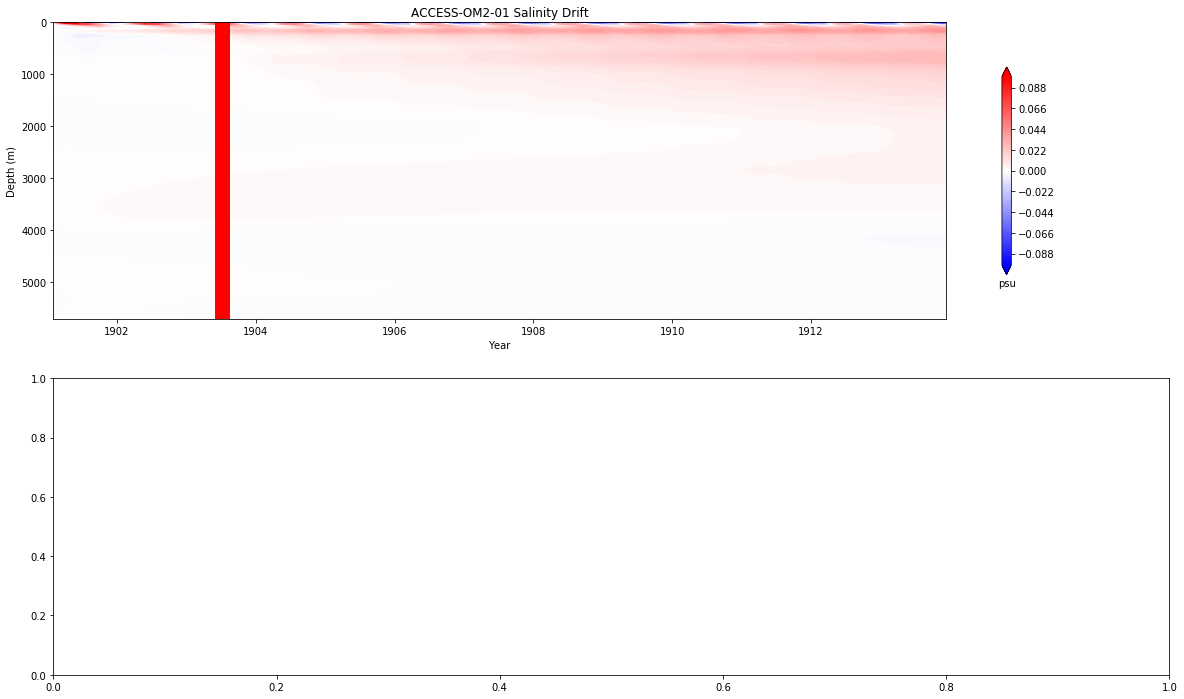

In [7]:
fig,ax=plt.subplots(2,1,figsize=(20,12))
plt.subplot(2,1,1)
clev = np.arange(-0.05,0.0501,0.002)
plt.contourf(salt_drift.time.values-1901,salt_drift.st_ocean,salt_drift.transpose('st_ocean','time'),cmap=plt.cm.bwr,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('psu')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('ACCESS-OM2-01 Salinity Drift')



/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5,1,'ACCESS-OM2-01 Temperature Drift')

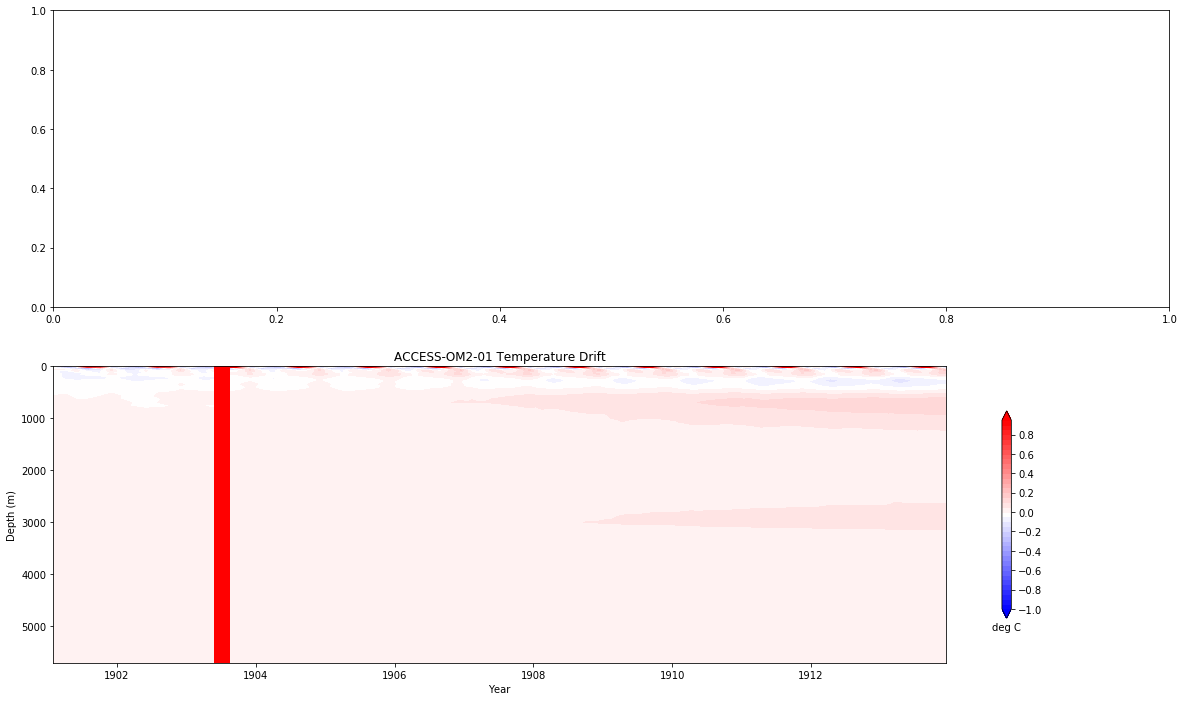

In [8]:
fig,ax=plt.subplots(2,1,figsize=(20,12))
plt.subplot(2,1,2)
clev = np.arange(-1.0,1.0,0.05)
plt.contourf(temp_drift.time.values-1901,temp_drift.st_ocean,temp_drift.transpose('st_ocean','time'),cmap=plt.cm.bwr,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('deg C')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('ACCESS-OM2-01 Temperature Drift')

